In [67]:

#we are trying to predict if student will get placed(job oppurtunity) based upon his IQ and CGPA

import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv("placement.csv")

In [69]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [70]:
df.shape

(100, 4)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [72]:
#preprocessing data by removing unnecessary column like the unnamed one
df = df.iloc[:,1:]
#.iloc: This is an indexing method in Pandas used for integer-location based indexing. It allows you to select rows and columns by their integer indices.
#[:,1:]: This is the slicing notation used within .iloc. Here's what it means:
#: before the comma means "select all rows".
#1: after the comma means "select columns starting from index 1 and onwards".

In [73]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [74]:
#EDA
import matplotlib.pyplot as plt

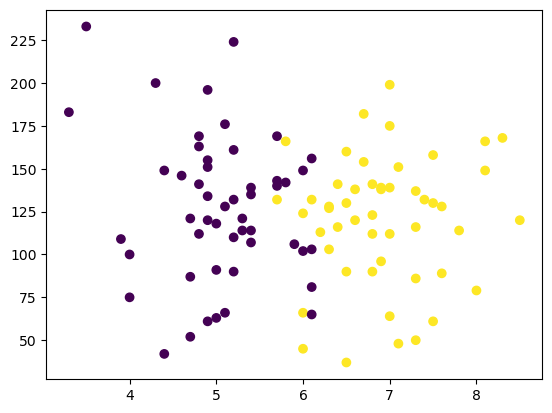

In [75]:
#The x-axis represents the 'cgpa' values.
#The y-axis represents the 'iq' values.
#The color of each point is determined by the 'placement' values, potentially differentiating points based on categories or levels within the 'placement' column.
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [76]:
#Extracting Input and OutPut Columns for Processing
X = df.iloc[:,0:2] #gets CGPA and IQ
y = df.iloc[:,-1] #gets placement column

In [77]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [78]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
#X_train: The training data for features.
#X_test: The test data for features.
#y_train: The training data for the target variable.
#y_test: The test data for the target variable.
X_train, X_test,y_train, y_test =  train_test_split(X,y,test_size=0.2)

In [80]:
X_train

,cgpa,iq
83,7.5,130.0
79,6.5,90.0
9,5.1,66.0
63,6.3,128.0
94,4.7,52.0
...,...,...
82,6.5,37.0
93,6.8,112.0
29,7.0,112.0
50,3.5,233.0


In [81]:
y_train

83    1
79    1
9     0
63    1
94    0
     ..
82    1
93    1
29    1
50    0
73    0
Name: placement, Length: 80, dtype: int64

In [82]:
X_test

,cgpa,iq
86,5.1,128.0
10,6.0,45.0
90,7.3,86.0
41,5.4,114.0
34,4.8,163.0
19,5.2,132.0
48,6.6,138.0
45,6.0,66.0
32,7.0,139.0
16,5.2,224.0


In [83]:
y_test

86    0
10    1
90    1
41    0
34    0
19    0
48    1
45    1
32    1
16    0
51    0
1     0
18    0
58    1
87    1
13    1
72    1
61    1
33    0
77    1
Name: placement, dtype: int64

In [84]:
# now we will perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
#It fits the scaler (scaler) to the training data (X_train), meaning it learns the parameters (like mean, standard deviation, minimum, maximum, etc.) required for scaling.
X_train = scaler.fit_transform(X_train)

In [86]:
#It applies the scaling transformation to the test data (X_test) using the parameters learned during the fitting stage (fit_transform on training data). This ensures that the test data is scaled in the same way as the training data, maintaining consistency in the scaling process.
X_test = scaler.transform(X_test)

In [87]:
#lets train our Moder
from sklearn.linear_model import LogisticRegression

In [88]:
clf = LogisticRegression()

In [89]:
clf.fit(X_train, y_train) #using our training data to make Algo learn about things

LogisticRegression()

In [90]:
#now we predict our Placement on X_test data of CGPA and IQ and we compare it with y_test the actual placement data
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [91]:
y_predict = clf.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
y_test #looks like 100% buts lets check using accuracy_score

86    0
10    1
90    1
41    0
34    0
19    0
48    1
45    1
32    1
16    0
51    0
1     0
18    0
58    1
87    1
13    1
72    1
61    1
33    0
77    1
Name: placement, dtype: int64

In [95]:
accuracy_score(y_predict,y_test) #thats 100% accuracy when testing data was just 10% but now we have 80 has testing data is 20%

0.8

In [98]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [99]:
#Lets see the decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

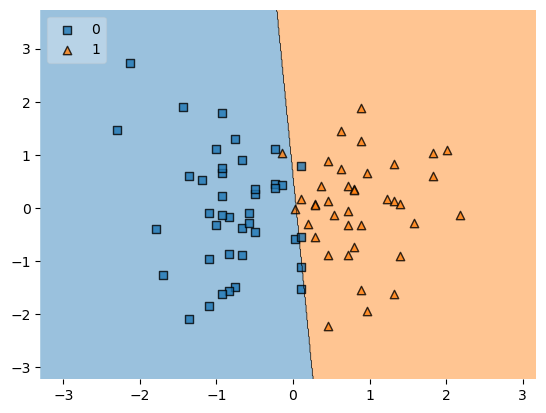

In [101]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [103]:
#Exporting Model
#import pickle #converts your object to a file
#pickle.dump(clf,open('placement_model.pkl','wb'))